## 머신러닝 - 분류

### mnist 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # 시각화 
from sklearn.model_selection import train_test_split  # 학습, 테스트 데이터 분류
from sklearn.datasets import fetch_openml  # mnist 데이터 불러오기

In [2]:
mnist = fetch_openml('mnist_784')  # mnist 데이터 불러오기

In [3]:
mnist.keys()  # mnist에 존재하는 데이터 분류 확인

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist['data'], mnist['target']  # x : 숫자 손글씨 데이터, y : 실제 값
print(f'x shape - {x.shape}, y shape - {y.shape}')  # x shape : 이미지 특성(28*28 픽셀이지만 한줄로 표현된 값) 784개의 데이터 70000개 , y_shape : 해당 이미지의 실제 값

x shape - (70000, 784), y shape - (70000,)


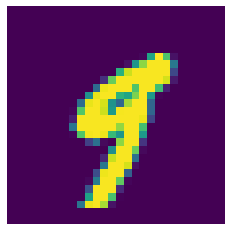

y : 9


In [5]:
# 36000번째에 존재하는 이미지 데이터 시각화
some_digit = np.array(x.iloc[36000, :])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis('off')
plt.show()
print(f'y : {y[36000]}')  # 실제 값

In [6]:
# 학습, 테스트 데이터 분류
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.3, shuffle=True)  # 학습 / 테스트 = 7 / 3 비율로 데이터 분할함. shuffle 파라미터를 이용해 데이터를 섞어줌

### 이진분류기 생성 및 성능 측정

In [7]:
from sklearn.linear_model import SGDClassifier  # 확률적 경사 하강법(SGD) 분류기

In [8]:
# 5는 True, 다른 숫자는 모두 False
y_tr_5 = (y_tr == '5')
y_te_5 = (y_te == '5')

In [9]:
'''
경사하강법은 최종적으로 구하고자 하는 함수의 최소값을 찾는데 사용된다. 
이때 일반적인 경사하강법은 한번의 반복을 완료하기위해 모든 데이터를 사용하지만, 확률적 경사 하강법은
데이터 집합의 일부를 임의로 선택하고 함수의 최소값에 도달하는 알고리즘이다.
'''

'\n경사하강법은 최종적으로 구하고자 하는 함수의 최소값을 찾는데 사용된다. \n이때 일반적인 경사하강법은 한번의 반복을 완료하기위해 모든 데이터를 사용하지만, 확률적 경사 하강법은\n데이터 집합의 일부를 임의로 선택하고 함수의 최소값에 도달하는 알고리즘이다.\n'

In [10]:
sgd_clf  = SGDClassifier(random_state = 42)
sgd_clf.fit(x_tr, y_tr_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])  # 성능 예측

/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

### 성능평가

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict # k-fold 검증
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score # 오차행렬, F1-score, ROC curve & score

In [13]:
cross_val_score(sgd_clf, x_tr, y_tr_5, cv=3, scoring='accuracy')  # k-fold 검증 

array([0.9618587 , 0.9628972 , 0.95714198])

In [14]:
# 오차행렬 출력
y_pred = sgd_clf.predict(x_tr)
confusion_matrix(y_tr_5, y_pred)

array([[44177,   359],
       [ 1299,  3165]])

In [15]:
f1_score(y_tr_5, y_pred)  # F1-score 출력

0.7924386579869804

In [16]:
# roc 커브 시각화 및 AUC 값 출력
y_score = cross_val_predict(sgd_clf, x_tr, y_tr_5, cv=3, method='decision_function')
fpr, tpr, thresholds = roc_curve(y_tr_5, y_score)

Text(0, 0.5, '진짜 양성비율')

/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51667 (\N{HANGUL SYLLABLE JIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bahk_insung/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from curr

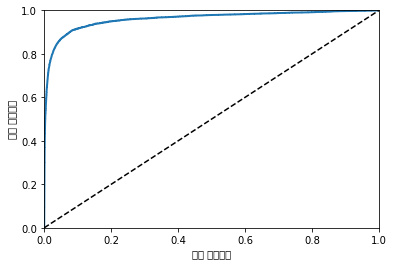

In [17]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('거짓 양성비율')
plt.ylabel('진짜 양성비율')

In [18]:
roc_auc_score(y_tr_5, y_score)

0.9607031390335908

### 다중분류

In [19]:
sgd_clf.fit(x_tr, y_tr)  # 5만 분류하는 것이 아니라 전제 분류(0,1,2,....,8,9)를 학습함

SGDClassifier(random_state=42)

In [20]:
# 오차행렬 출력
y_tr_pred = cross_val_predict(sgd_clf, x_tr, y_tr, cv=3) 
conf_mx = confusion_matrix(y_tr, y_tr_pred)
conf_mx

array([[4536,    1,   71,   24,   14,   25,   60,    5,   38,   34],
       [   2, 5295,   33,   29,    5,   20,   24,    8,   54,   11],
       [  27,   42, 4358,   90,   54,   24,  132,   51,   98,   28],
       [   8,   15,  199, 4405,   10,  138,   32,   34,   87,   96],
       [  13,   25,   57,   20, 4197,   20,   95,   33,   70,  264],
       [  43,   29,   59,  332,   40, 3516,  130,   30,  183,  102],
       [  21,   12,  112,   11,   33,   86, 4485,    1,   33,    1],
       [  17,   29,  107,   51,   75,   13,    8, 4497,   24,  279],
       [  28,  116,  186,  269,   41,  273,   69,   22, 3509,  249],
       [  21,   19,   47,  157,  227,   64,    1,  221,   83, 4028]])